In [1]:
#!pip install keras==2.7.0

In [2]:
#!pip install tensorflow==2.7.0
#!pip install pydot

In [3]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization library
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

# Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier


In [4]:
#Digit MNIST dataset
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

In [5]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_test_digit[3]

0

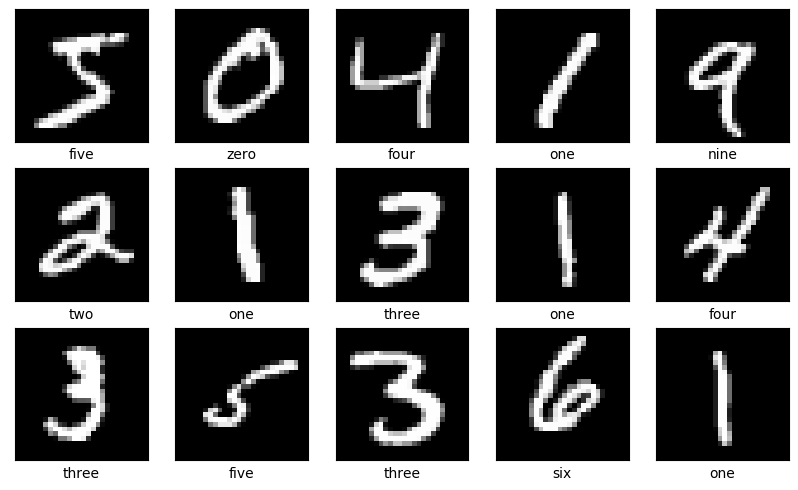

In [8]:
# Names of numbers in the dataset in order
col_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# Visualizing the digits
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    
    # Ensure y_train_digit[i] is within the valid range
    if 0 <= y_train_digit[i] < len(col_names):
        plt.imshow(x_train_digit[i], cmap='gray')
        plt.xlabel(col_names[y_train_digit[i]])
    else:
        # Handle the case where y_train_digit[i] is out of range
        plt.xlabel("Invalid label")

plt.show()



In [9]:
x_train_digit.shape

(60000, 28, 28)

In [10]:
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit=x_test_digit.reshape(10000,784)

In [11]:
x_train_digit.shape

(60000, 784)

In [12]:
y_test_digit.shape

(10000,)

In [13]:
#Encoding Digit MNIST Lables
y_train_digit = to_categorical(y_train_digit,num_classes=10)

y_test_digit = to_categorical(y_test_digit,num_classes=10)

In [14]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
# Creating base neural network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    # Dropout(0.3),
    # BatchNormalization(),
    Dense(64, activation='relu'),
    # Dropout(0.3),
    # BatchNormalization(),
    Dense(10, activation='sigmoid'),
])


In [16]:
#param_number=output_channel_number * (input_channel_number+1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
history=model.fit(x_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(x_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 1.9922 - accuracy: 0.8037 - val_loss: 0.5082 - val_accuracy: 0.8634
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.3989 - accuracy: 0.9002 - val_loss: 0.3657 - val_accuracy: 0.9104
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2872 - accuracy: 0.9249 - val_loss: 0.3307 - val_accuracy: 0.9231
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2277 - accuracy: 0.9403 - val_loss: 0.2510 - val_accuracy: 0.9445
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1826 - accuracy: 0.9517 - val_loss: 0.2115 - val_accuracy: 0.9526
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1566 - accuracy: 0.9569 - val_loss: 0.2228 - val_accuracy: 0.9510
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1357 - accuracy: 0.9621 - val_loss: 0.1746 - val_accuracy: 0.9612
Epoch 

In [24]:
#predicting the labels-digit
y_predict=model.predict(x_test_digit)

In [27]:
y_predict[0]

array([3.3947799e-05, 9.9999690e-01, 1.0000000e+00, 9.9999607e-01,
       1.0000000e+00, 9.7027087e-01, 1.3018534e-01, 1.0000000e+00,
       9.9717969e-01, 9.9999976e-01], dtype=float32)

In [29]:
y_predicts=np.argmax(y_predict,axis=1)
#here we get the index of maximum value in the encoded vector


In [30]:
y_predicts

array([2, 0, 1, ..., 0, 0, 1], dtype=int64)

In [31]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [32]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

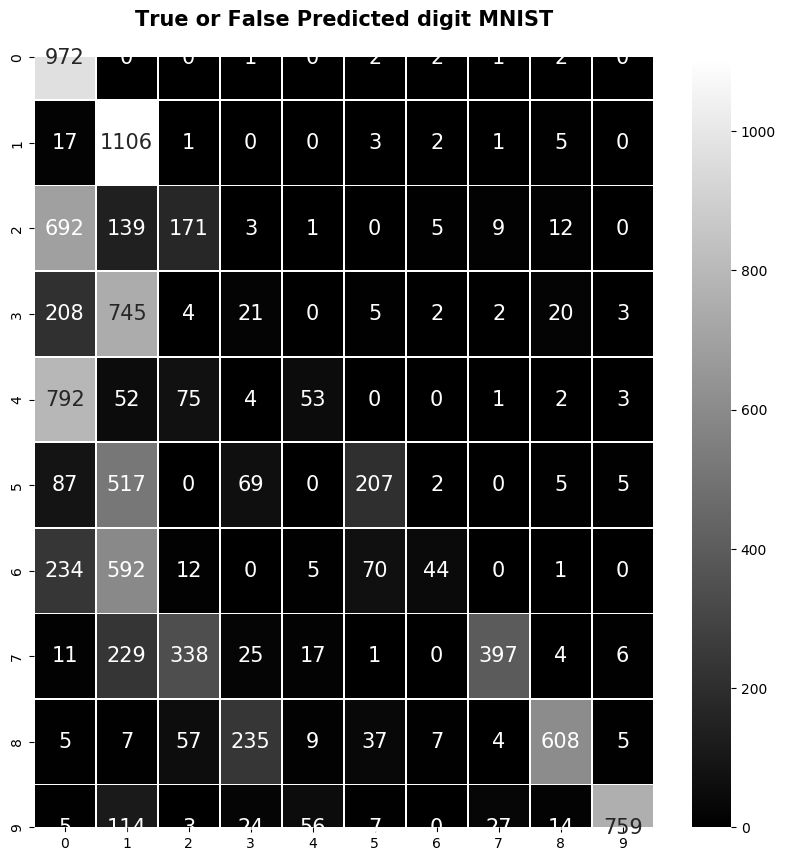

In [34]:
#confusion matrix for digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False Predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.32      0.99      0.49       980
           1       0.32      0.97      0.48      1135
           2       0.26      0.17      0.20      1032
           3       0.05      0.02      0.03      1010
           4       0.38      0.05      0.09       982
           5       0.62      0.23      0.34       892
           6       0.69      0.05      0.09       958
           7       0.90      0.39      0.54      1028
           8       0.90      0.62      0.74       974
           9       0.97      0.75      0.85      1009

    accuracy                           0.43     10000
   macro avg       0.54      0.42      0.38     10000
weighted avg       0.54      0.43      0.39     10000



In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


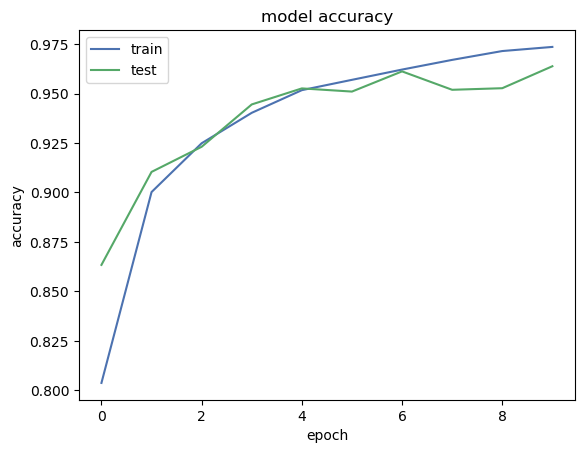

In [40]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

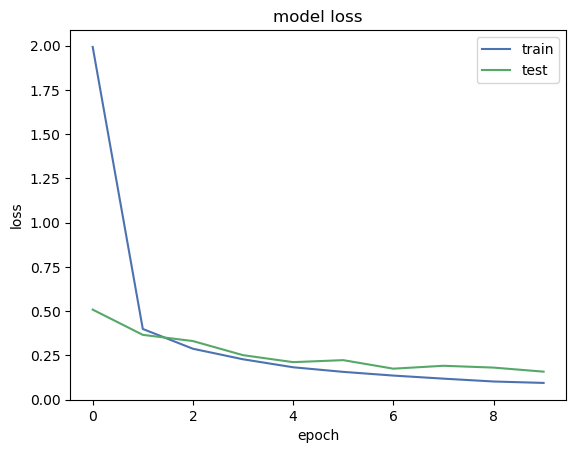

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [42]:
#tf.expand_dims(x_test_digit[0])
y_predict_single = model.predict(x_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single,axis=1)
#here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

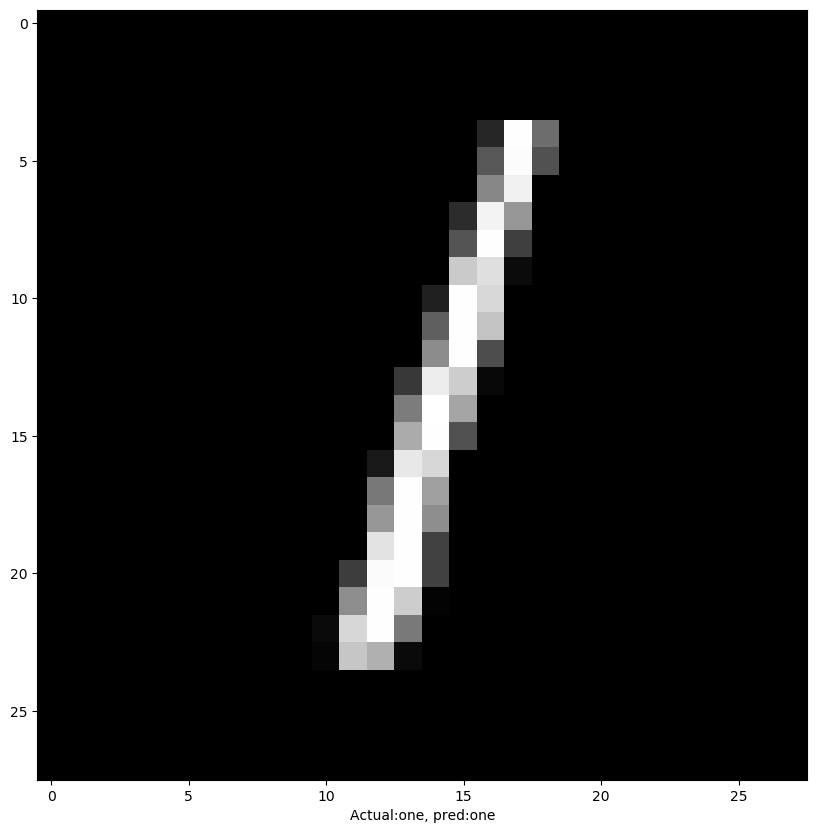

In [44]:
# Names of numbers in the dataset in order
col_names = ['zero', 'one', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Visualizing the digits
plt.figure(figsize=(10,10))
plt.imshow(x_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{}, pred:{}".format(col_names[np.argmax(y_test_digit[2])], col_names[y_predicts_single[0]]))
plt.show()
